In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 16kB/s 
     |████████████████████████████████| 501kB 47.8MB/s 
     |████████████████████████████████| 4.3MB 47.9MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [0]:
print(tf.__version__)

2.0.0-rc0


In [1]:
!git clone https://github.com/dipak104/Movie-Poster-Genre-Clasification.git

Cloning into 'Movie-Poster-Genre-Clasification'...
remote: Enumerating objects: 7876, done.
remote: Counting objects: 100% (7876/7876), done.
remote: Compressing objects: 100% (7874/7874), done.
remote: Total 7876 (delta 1), reused 7873 (delta 1), pack-reused 0
Receiving objects: 100% (7876/7876), 246.59 MiB | 51.23 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7873/7873), done.


In [0]:
data = pd.read_csv('/content/Movie-Poster-Genre-Clasification/Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
data.shape

(7254, 27)

In [0]:
img_width = 350
img_height = 350

X = []
for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)


100%|██████████| 7254/7254 [00:32<00:00, 224.15it/s]


In [0]:
X.shape

(7254, 350, 350, 3)

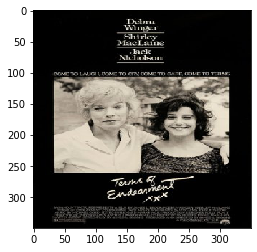

In [0]:
plt.imshow(X[0])

In [0]:
data['Genre'][0]

"['Comedy', 'Drama']"

In [0]:
y = data.drop(['Id','Genre'], axis=1)

In [0]:
y = y.to_numpy()

In [0]:
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6165, 350, 350, 3), (1089, 350, 350, 3), (6165, 25), (1089, 25))

## Build a CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 220s 36ms/sample - loss: 0.6951 - accuracy: 0.6460 - val_loss: 2.5405 - val_accuracy: 0.4922
Epoch 2/5
6165/6165 [==============================] - 213s 35ms/sample - loss: 0.3103 - accuracy: 0.8915 - val_loss: 1.0909 - val_accuracy: 0.7639
Epoch 3/5
6165/6165 [==============================] - 215s 35ms/sample - loss: 0.2604 - accuracy: 0.9066 - val_loss: 1.8531 - val_accuracy: 0.6935
Epoch 4/5
6165/6165 [==============================] - 212s 34ms/sample - loss: 0.2508 - accuracy: 0.9100 - val_loss: 2.0629 - val_accuracy: 0.7899
Epoch 5/5
6165/6165 [==============================] - 210s 34ms/sample - loss: 0.2453 - accuracy: 0.9114 - val_loss: 0.2813 - val_accuracy: 0.9064


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

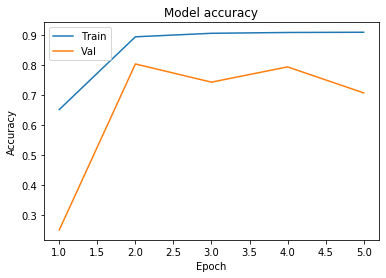

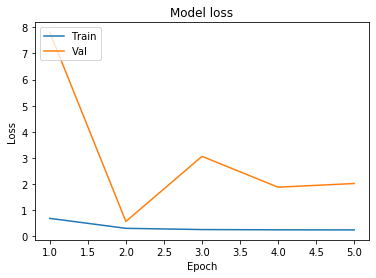

In [0]:
plot_learningCurve(history, 5)

### Testing model with some real images

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

[[0.00587228 0.01464933 0.00684053 0.08720484 0.00528029 0.00377658
  0.9622936  0.63071084 0.04182762 0.5146491  0.9582075  0.01067159
  0.03268003 0.05284613 0.8967717  0.99948645 0.2122561  0.00411564
  0.77784014 0.8034853  0.9934733  0.01878861 0.47113684 0.00765535
  0.14085793]]

[0.00587228 0.01464933 0.00684053 0.08720484 0.00528029 0.00377658
 0.9622936  0.63071084 0.04182762 0.5146491  0.9582075  0.01067159
 0.03268003 0.05284613 0.8967717  0.99948645 0.2122561  0.00411564
 0.77784014 0.8034853  0.9934733  0.01878861 0.47113684 0.00765535
 0.14085793]

[15 20  6]

N/A
Short
Documentary


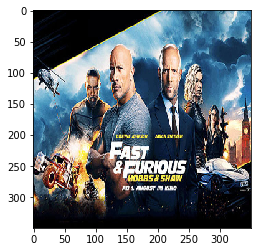

In [0]:
path = '/content/Movies-Poster_Dataset/fast.jpg'
img = image.load_img(path, target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
print()

y_pred = model.predict(img)
print(y_pred)
print()
print(y_pred[0])
print()
top_3_pred = np.argsort(y_pred[0])[:-4:-1]
print(top_3_pred)
print()

for i in range(3):
  print(classes[top_3_pred[i]])